# Del 9: Priprava in čiščenje podatkov - napredno

## Working With Strings In Pandas

### Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read the data sets into pandas
world_dev = pd.read_csv("data/World_dev.csv")
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [3]:
merged = pd.merge(left=happiness2015,
                 right=world_dev,
                 how="left",
                 left_on="Country",
                 right_on="ShortName")


col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged.rename(col_renaming, axis=1, inplace=True)

In [4]:
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


### Using Apply to Transform Strings

In [5]:
currency_categories = merged["CurrencyUnit"].str.lower().str.split().str.get(-1)
currency_categories.value_counts()

euro        20
franc       16
dollar      12
dinar        8
peso         7
            ..
rupiah       1
lira         1
naira        1
ngultrum     1
afghani      1
Name: CurrencyUnit, Length: 71, dtype: int64

## Regular Expressions in Pandas

In [6]:
import re

In [7]:
print(re.match(r"and", "hand"))

None


In [8]:
print(re.match(r"and", "and"))

<re.Match object; span=(0, 3), match='and'>


In [9]:
print(re.search(r"and", "hand"))

<re.Match object; span=(1, 4), match='and'>


In [10]:
print(re.match(r"and", "andh"))

<re.Match object; span=(0, 3), match='and'>


### Regex in pandas

In [11]:
merged.head(2)

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0


In [12]:
merged["SpecialNotes"].head(10)

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Fiscal year end: March 31; reporting period fo...
5    A simple multiplier is used to convert the nat...
6    A simple multiplier is used to convert the nat...
7    Fiscal year end: June 30; reporting period for...
8    Fiscal year end: March 31; reporting period fo...
9    Fiscal year end: June 30; reporting period for...
Name: SpecialNotes, dtype: object

In [13]:
merged["SpecialNotes"].str.contains(r"[]iscal year")

error: unterminated character set at position 0

### Finding Specific Words in Strings

<img src="./images/set_syntax_breakdown.svg">

<img src="./images/basic_match_2.svg">

### Import new dataset

In [15]:
hn = pd.read_csv('data/hacker_news.csv')

In [16]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


In [17]:
# Želimo pridobiti vse Python novice
hn[hn["title"].str.contains(r"[Py]ython")].head()

,id,title,url,num_points,num_comments,author,created_at
102,10974870,From Python to Lua: Why We Switched,https://www.distelli.com/blog/using-lua-for-ou...,243,188,chase202,1/26/2016 18:17
103,11244541,Ubuntu 16.04 LTS to Ship Without Python 2,http://news.softpedia.com/news/ubuntu-16-04-lt...,2,1,_snydly,3/8/2016 10:39
144,10963528,Create a GUI Application Using Qt and Python i...,http://digitalpeer.com/s/c63e,21,1,zoodle,1/24/2016 19:01
196,10716331,How I Solved GCHQ's Xmas Card with Python and ...,http://matthewearl.github.io/2015/12/10/gchq-x...,6,1,kipi,12/11/2015 10:38
436,11895088,"Unikernel Power Comes to Java, Node.js, Go, an...",http://www.infoworld.com/article/3082051/open-...,3,1,syslandscape,6/13/2016 16:23


In [18]:
# Želimo pridobiti vse novice z email besedo
hn[hn["title"].str.contains(r"e-?mail")].head()

,id,title,url,num_points,num_comments,author,created_at
119,10603601,Show HN: Send an email from your shell to your...,https://ping.registryd.com,4,1,ybrs,11/20/2015 20:23
313,10736929,Disposable emails for safe spam free shopping,http://couponinbox.com,1,1,genesem,12/15/2015 10:20
1361,11079401,Ask HN: Doing cold emails? helps us prove this...,NaN,8,12,going_to_800,2/11/2016 10:48
1750,12021044,"Protect yourself from spam, bots and phishing ...",http://die.life?x=3,4,2,code2crud,7/2/2016 2:04
2421,10934913,Ashley Madison hack treating email,http://pastebin.com/V5tmcFXq,7,4,hippich,1/19/2016 23:24


In [19]:
# Želimo pridobiti vse email naslove
hn.loc[hn["title"].str.contains(r"[\w\d\-\.]+a?@[\w]+\.\w+"), "title"].head(10)

1057    Site for generating bids and invoices- User:te...
Name: title, dtype: object

In [20]:
hn.loc[1057, "title"]

'Site for generating bids and invoices- User:test000@bidvoice.co PW:Test_000'

In [21]:
# želimo ugotoviti vse tipe podatkovnih baz
hn["title"].str.extract(r"(\w+SQL\w*)", flags=re.I)[0].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
MemSQL         1
SparkSQL       1
nosql          1
mySql          1
CloudSQL       1
Name: 0, dtype: int64

In [22]:
# Izbiranje URLjev

hn["url"].str.extract(r"(?P<protocol>https?):\/\/(?P<domain>[\w\.]+)\/?(?P<path>[^\s]*)")

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


In [23]:
#pd.options.display.max_colwidth = 150

In [24]:
import pandas as pd

# Create a pandas dataframe with a column of URLs
df = pd.DataFrame({'url': ['https://www.example.com/path1', 'https://www.example.com/path2', 'https://www.example.com/path3']})

# Extract the protocol, domain, and path from the URLs
df = df['url'].str.extract(r'(https?)://([^/]+)/(.*)')

df.rename(columns={'protocol': 'Protocol', 'domain': 'Domain', 'path': 'Path'}, inplace=True)

In [25]:
df

,0,1,2
0,https,www.example.com,path1
1,https,www.example.com,path2
2,https,www.example.com,path3


## Working With Missing Data

### Introduction

In [26]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [27]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [28]:
shape_2015

(164, 13)

In [29]:
shape_2016

(164, 14)

In [30]:
shape_2017

(164, 13)

### Identifying Missing Values

In [32]:
missing = happiness2015['Happiness Score'].isnull()

In [33]:
happiness2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [34]:
happiness2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [35]:
missing_2016 = happiness2016.isnull().sum()

In [36]:
missing_2016

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [37]:
missing_2017 = happiness2017.isnull().sum()

In [38]:
missing_2017

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

### Correcting Data Cleaning Errors that Result in Missing Values

In [54]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [55]:
combined.isnull().sum()

COUNTRY                          164
Country                          328
DYSTOPIA RESIDUAL                180
Dystopia Residual                334
ECONOMY GDP PER CAPITA           180
Economy (GDP per Capita)         334
FAMILY                           180
FREEDOM                          180
Family                           334
Freedom                          334
GENEROSITY                       180
Generosity                       334
HAPPINESS RANK                   180
HAPPINESS SCORE                  180
HEALTH LIFE EXPECTANCY           180
Happiness Rank                   334
Happiness Score                  334
Health (Life Expectancy)         334
LOWER CONFIDENCE INTERVAL        335
REGION                           335
Region                           334
Standard Error                   334
TRUST GOVERNMENT CORRUPTION      180
Trust (Government Corruption)    334
UPPER CONFIDENCE INTERVAL        335
WHISKER HIGH                     337
WHISKER LOW                      337
Y

In [41]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [42]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ', regex=True) \
                    .str.replace('\s+', ' ', regex=True) \
                    .str.strip() \
                    .str.upper()

In [43]:
happiness2017.head(2)

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [44]:
happiness2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [45]:
happiness2016.columns = happiness2016.columns.str.replace('.', ' ', regex=True) \
                    .str.replace(r'[\(\)]', '', regex=True) \
                    .str.strip() \
                    .str.upper()

In [46]:
happiness2016.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Denmark,Western Europe,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [47]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [56]:
happiness2015.columns = happiness2015.columns.str.replace('.', ' ', regex=True) \
                    .str.replace(r'[\(\)]', '', regex=True) \
                    .str.strip() \
                    .str.upper()

In [57]:
happiness2015.head(2)

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [58]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [59]:
missing = combined.isnull().sum()

In [60]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

### Visualizing Missing Data

In [61]:
import seaborn as sns

In [62]:
combined_updated = combined.set_index('YEAR')

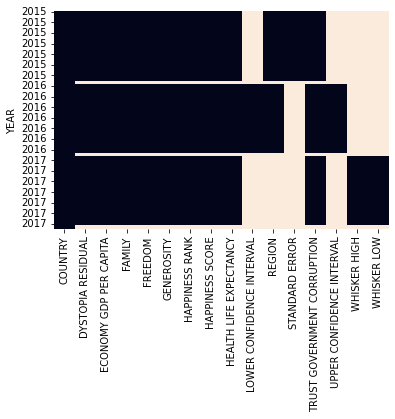

In [63]:
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

In [64]:
regions_2017 = combined[combined['YEAR'] == 2017]['REGION']

In [65]:
missing = regions_2017.isnull().sum()

In [66]:
missing

164

### Using Data From Additional Sources to Fill in Missing Values

In [67]:
# create dataframe named regions containing all of the countries 
regions2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions2016 = happiness2016[['COUNTRY', 'REGION']].copy()
regions = pd.concat([regions2015, regions2016], ignore_index=True)
regions.dropna(inplace=True)
regions.drop_duplicates(inplace=True)

In [68]:
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [69]:
combined = pd.merge(left=combined, 
                     right=regions, 
                     on='COUNTRY',
                     how='left')

In [70]:
combined.shape

(492, 18)

In [71]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'REGION_x',
       'STANDARD ERROR', 'TRUST GOVERNMENT CORRUPTION',
       'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW', 'YEAR',
       'REGION_y'],
      dtype='object')

In [72]:
combined = combined.drop('REGION_x', axis=1) 

In [73]:
missing = combined.isnull().sum()

In [74]:
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
REGION_y                         0
dtype: int64

### Identifying Duplicates Values

In [75]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR',
       'TRUST GOVERNMENT CORRUPTION', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'YEAR', 'REGION_y'],
      dtype='object')

In [76]:
combined.rename(columns = {'REGION_y':'REGION'}, inplace=True)

In [77]:
combined.columns

Index(['COUNTRY', 'DYSTOPIA RESIDUAL', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'FREEDOM', 'GENEROSITY', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'HEALTH LIFE EXPECTANCY', 'LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR',
       'TRUST GOVERNMENT CORRUPTION', 'UPPER CONFIDENCE INTERVAL',
       'WHISKER HIGH', 'WHISKER LOW', 'YEAR', 'REGION'],
      dtype='object')

In [78]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])

In [79]:
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION


In [84]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

In [85]:
combined.head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
0,SWITZERLAND,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,ICELAND,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,DENMARK,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,NORWAY,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,CANADA,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,0.03553,0.32957,NaN,NaN,NaN,2015,North America


In [86]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])

In [87]:
combined[dups]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Correcting Duplicates Values

In [88]:
combined[combined['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,NaN,0.06161,0.39928,NaN,NaN,NaN,2015,Sub-Saharan Africa
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97.0,5.057,0.33108,4.934,NaN,0.36794,5.18,NaN,NaN,2016,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


### Handle Missing Values by Dropping Columns

In [ ]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

### Analyzing Missing Data

### Handling Missing Values with Imputation

### Dropping Rows

## Identifying Hidden Missing Data

### Primer: Happiness 2015

In [ ]:
happiness2015 = pd.read_csv('data/wh_2015_special.csv')

### Primer: Diabetes

In [ ]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

#### Analyzing missingness percentage

## Andvance Visualization of Missing Data

In [ ]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Missingness Patterns

## Handle Missing Values

### Dropping Rows

### Imputation Techniques

#### Mean & median imputation


#### Mode and constant imputation

#### Visualize imputations

In [ ]:



imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

